In [2]:
import numpy
import pylab
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import cmath
import random

In [3]:
#Angles
A=numpy.array([])
B=numpy.array([])
for i in range (0,1000):
    Alpha12=random.uniform(0, 2*numpy.pi)
    Alpha13=random.uniform(0, 2*numpy.pi)
    if Alpha12 not in A: 
        A=numpy.append(A, Alpha12)
    if Alpha13 not in B: 
        B=numpy.append(B, Alpha13)

In [4]:
#Normal hierarchy parameters (Best Fit)

NHs12=0.307
NHs13=0.022
NHc12=0.693
NHc13=0.978

solarmass=0.0000753
atmmass=0.0025283

#Normal hierarchy parameters (3 sigma)

maxNHs12=0.346
minNHs12=0.268

maxNHs13=0.0241
minNHs13=0.0199

maxNHc12=0.732
minNHc12=0.654

maxNHc13=0.9801
minNHc13=0.9759

maxsolarmass=0.0000807
minsolarmass=0.0000699

maxatmmass=0.0025631
minatmmass=0.0024935

NHm1=numpy.linspace(0.0001,0.001,2000) 
NHm1=numpy.append(NHm1, numpy.linspace(0.001,0.01,2000))
NHm1=numpy.append(NHm1, numpy.linspace(0.01,0.1,2000))
NHm1=numpy.append(NHm1, numpy.linspace(0.1,1,2000))
NHm1=numpy.append(NHm1, numpy.linspace(1,10,2000))

maxNHm2=(NHm1**2+maxsolarmass)**(1/2)
NHm2=(NHm1**2+solarmass)**(1/2)
minNHm2=(NHm1**2+minsolarmass)**(1/2)

maxNHm3=(NHm1**2+maxatmmass)**(1/2)
NHm3=(NHm1**2+atmmass)**(1/2)
minNHm3=(NHm1**2+minatmmass)**(1/2)

#solarmass=del_m21^2
#atmmass=del_m31^2

In [5]:
#Inverted Hierarchy parameters (Best Fit)

IHs12=0.307
IHs13=0.022
IHc12=0.693
IHc13=0.978

Isolarmass=0.0000753
Iatmmass=0.002536

#Inverted hierarchy parameters (3 sigma)

maxIHs12=0.346
minIHs12=0.268

maxIHs13=0.0241
minIHs13=0.0199

maxIHc12=0.732
minIHc12=0.654

maxIHc13=0.9801
minIHc13=0.9759

maxIsolarmass=0.0000807
minIsolarmass=0.0000699

maxIatmmass=0.002638
minIatmmass=0.002434

IHm3=numpy.linspace(0.0001,0.001,2000) 
IHm3=numpy.append(IHm3, numpy.linspace(0.001,0.01,2000))
IHm3=numpy.append(IHm3, numpy.linspace(0.01,0.1,2000))
IHm3=numpy.append(IHm3, numpy.linspace(0.1,1,2000))
IHm3=numpy.append(IHm3, numpy.linspace(1,10,2000))

maxIHm2=(IHm3**2+maxIsolarmass+maxIatmmass)**(1/2)
IHm2=(IHm3**2+Isolarmass+Iatmmass)**(1/2)
minIHm2=(IHm3**2+minIsolarmass+minIatmmass)**(1/2)

maxIHm1=(IHm3**2+maxIatmmass)**(1/2)
IHm1=(IHm3**2+Iatmmass)**(1/2)
minIHm1=(IHm3**2+minIatmmass)**(1/2)

#solarmass=del_m21^2
#atmmass=del_m31^2

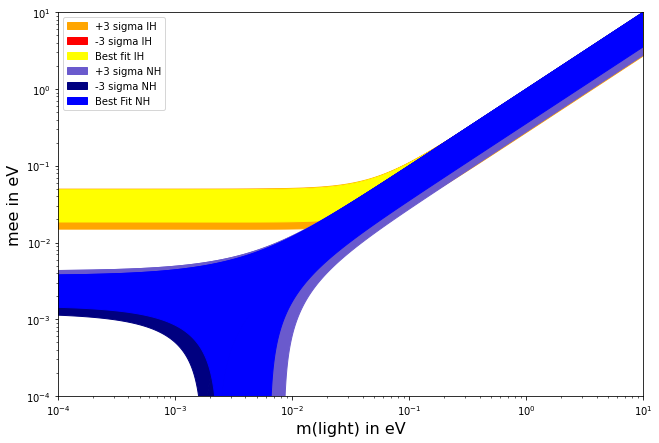

In [12]:
plt.figure(figsize=(9,6))

#for i in range(0,1000):
#    IHm3=numpy.linspace(0,1,10000)
#    IHmee=abs(IHc12*IHc13*IHm1 + IHs12*IHc13*IHm2*cmath.exp(complex(0,A[i])) + IHs13*IHm3*cmath.exp(complex(0,B[i])))

#    plt.plot(IHm3,IHmee,color="yellow",linestyle="-",linewidth=1, alpha=1)
    

maxIHmee1=abs(minIHc12*minIHc13*maxIHm1 + maxIHs12*minIHc13*maxIHm2 + maxIHs13*IHm3)
IHmee1=abs(IHc12*IHc13*IHm1 + IHs12*IHc13*IHm2 + IHs13*IHm3) #All masses different, both angles=0
minIHmee1=abs(maxIHc12*maxIHc13*minIHm1 + minIHs12*maxIHc13*minIHm2 + minIHs13*IHm3)

maxIHmee2=abs(minIHc12*minIHc13*maxIHm1 - maxIHs12*minIHc13*maxIHm2 - maxIHs13*IHm3)
IHmee2=abs(IHc12*IHc13*IHm1 - IHs12*IHc13*IHm2 - IHs13*IHm3) #All masses different, both angles=pi
minIHmee2=abs(maxIHc12*maxIHc13*minIHm1 - minIHs12*maxIHc13*minIHm2 - minIHs13*IHm3)

#plt.plot(IHm3,maxIHmee1,color="black",linestyle="-",linewidth=1, alpha=0.5)
#plt.plot(IHm3,IHmee1,color="black",linestyle="-",linewidth=1, alpha=1)
#plt.plot(IHm3,minIHmee1,color="black",linestyle="-",linewidth=1, alpha=0.5)

#plt.plot(IHm3,maxIHmee2,color="red",linestyle="-",linewidth=1, alpha=0.5)
#plt.plot(IHm3,IHmee2,color="gray",linestyle="-",linewidth=1, alpha=1)
#plt.plot(IHm3,minIHmee2,color="red",linestyle="-",linewidth=1, alpha=0.5)

plt.fill_between(IHm3, maxIHmee1, maxIHmee2, color="orange",label="+3 sigma IH")

plt.fill_between(IHm3, minIHmee1, minIHmee2, color="red",label="-3 sigma IH")

plt.fill_between(IHm3, IHmee1, IHmee2, color="yellow", label="Best fit IH")


#for i in range(0,1000):
#    NHm1=numpy.linspace(0,1,10000)
#    NHmee=abs(NHc12*NHc13*NHm1 + NHs12*NHc13*NHm2*cmath.exp(complex(0,A[i])) + NHs13*NHm3*cmath.exp(complex(0,B[i])))

#    plt.plot(NHm1,NHmee,color="blue",linestyle="-",linewidth=1, alpha=1)
    
maxNHmee1=abs(minNHc12*minNHc13*NHm1 - maxNHs12*minNHc13*maxNHm2 + maxNHs13*maxNHm3)    
NHmee1=abs(NHc12*NHc13*NHm1 - NHs12*NHc13*NHm2 + NHs13*NHm3) #All masses different, first angle=pi, second angle=0
minNHmee1=abs(maxNHc12*maxNHc13*NHm1 - minNHs12*maxNHc13*minNHm2 + minNHs13*minNHm3)

maxNHmee2=abs(minNHc12*minNHc13*NHm1 + maxNHs12*minNHc13*maxNHm2 + maxNHs13*maxNHm3)
NHmee2=abs(NHc12*NHc13*NHm1 + NHs12*NHc13*NHm2 + NHs13*NHm3) #All masses different, both angles=0
minNHmee2=abs(maxNHc12*maxNHc13*NHm1 + minNHs12*maxNHc13*minNHm2 + minNHs13*minNHm3)

maxNHmee3=abs(minNHc12*minNHc13*NHm1 - maxNHs12*minNHc13*maxNHm2 - maxNHs13*maxNHm3)
NHmee3=abs(NHc12*NHc13*NHm1 - NHs12*NHc13*NHm2 - NHs13*NHm3) #All masses different, both angles=pi
minNHmee3=abs(maxNHc12*maxNHc13*NHm1 - minNHs12*maxNHc13*minNHm2 - minNHs13*minNHm3)

#plt.plot(NHm1,maxNHmee1,color="gray",linestyle="-",linewidth=1, alpha=1)
#plt.plot(NHm1,NHmee1,color="gray", linestyle="-",linewidth=1, alpha=1)
#plt.plot(NHm1,minNHmee1,color="gray",linestyle="-",linewidth=1, alpha=0.5)

#plt.plot(NHm1,maxNHmee2,color="black",linestyle="-",linewidth=1, alpha=1)
#plt.plot(NHm1,NHmee2,color="black",linestyle="-",linewidth=1, alpha=1)
#plt.plot(NHm1,minNHmee2,color="black",linestyle="-",linewidth=1, alpha=0.5)

#plt.plot(NHm1,maxNHmee3,color="pink",linestyle="-",linewidth=1, alpha=1)
#plt.plot(NHm1,NHmee3,color="red",linestyle="-",linewidth=1, alpha=1)
#plt.plot(NHm1,minNHmee3,color="red",linestyle="-",linewidth=1, alpha=0.5)

plt.fill_between(NHm1, maxNHmee1, maxNHmee2, color="slateblue",label="+3 sigma NH")
plt.fill_between(NHm1, maxNHmee2, maxNHmee3, color="slateblue")
plt.fill_between(NHm1, maxNHmee1, 0,where=(NHm1<0.0084)&(NHm1>0.003), color="slateblue", alpha=1)

plt.fill_between(NHm1, minNHmee1, minNHmee2, color="navy", label="-3 sigma NH")
plt.fill_between(NHm1, minNHmee2, minNHmee3, color="navy")
plt.fill_between(NHm1, minNHmee1, 0,where=(NHm1<0.005)&(NHm1>0.0019), color="navy", alpha=1)

plt.fill_between(NHm1, NHmee1, NHmee2, color="blue",label="Best Fit NH")
plt.fill_between(NHm1, NHmee2, NHmee3, color="blue", alpha=1)
plt.fill_between(NHm1, NHmee1, 0,where=(NHm1<0.0064)&(NHm1>0.0025), color="blue", alpha=1)

plt.xscale("log")
plt.yscale("log")

plt.xlim(0.0001,10)
plt.ylim(0.0001,10)
plt.tight_layout()
plt.xlabel("m(light) in eV",fontsize=16)
plt.ylabel("mee in eV",fontsize=16)
plt.legend(fontsize=10,loc=2)
plt.show()

In [ ]:
print(plt.rcParams["figure.figsize"])